In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = [15, 5]
from IPython import display
from ipywidgets import interact, widgets

In [0]:
ConfirmedCases_raw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
Deaths_raw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
Recoveries_raw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')


In [0]:
def clean_data(df_raw):
  df_cleaned = df_raw.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_name='Cases', var_name='Date')
  df_cleaned = df_cleaned.set_index(['Country/Region', 'Province/State', 'Date'])
  return df_cleaned

In [0]:
# Cleaning all data
ConfirmedCases = clean_data(ConfirmedCases_raw)
Deaths = clean_data(Deaths_raw)
Recoveries = clean_data(Recoveries_raw)

In [0]:
poland = ConfirmedCases.loc['Poland']

In [24]:
poland.tail(12)

Lat     Long  Cases
Province/State Date                            
NaN            3/4/20   51.9194  19.1451      1
               3/5/20   51.9194  19.1451      1
               3/6/20   51.9194  19.1451      5
               3/7/20   51.9194  19.1451      5
               3/8/20   51.9194  19.1451     11
               3/9/20   51.9194  19.1451     16
               3/10/20  51.9194  19.1451     22
               3/11/20  51.9194  19.1451     31
               3/12/20  51.9194  19.1451     49
               3/13/20  51.9194  19.1451     68
               3/14/20  51.9194  19.1451    103
               3/15/20  51.9194  19.1451    119

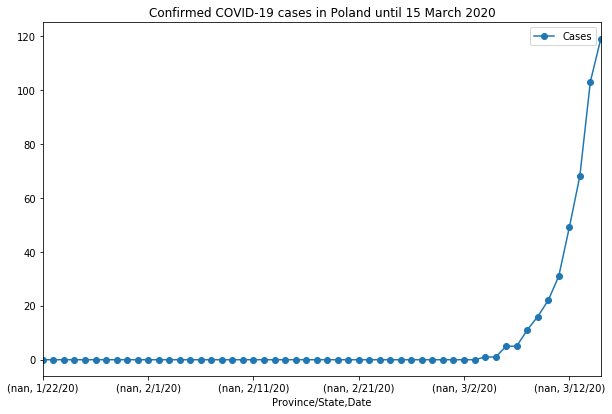

In [36]:
plot_poland = poland.plot(y='Cases', figsize=[10,6.5], marker='o', title='Confirmed COVID-19 cases in Poland until 15 March 2020')

In [32]:
hubei=ConfirmedCases.loc['China', 'Hubei']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: PerformanceWarning:

indexing past lexsort depth may impact performance.



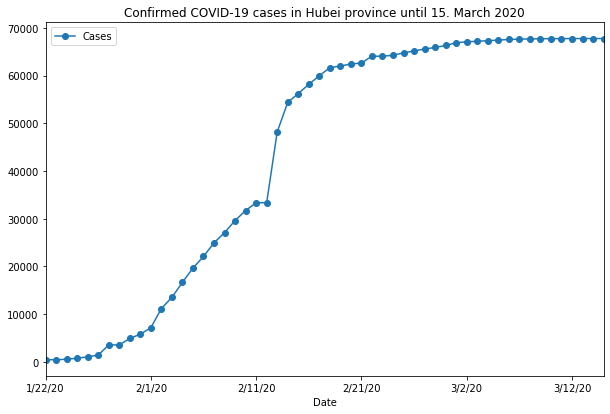

In [45]:
plot_hubei = hubei.plot(y='Cases', figsize=[10,6.5], marker='o', title='Confirmed COVID-19 cases in Hubei province until 15. March 2020')

In [0]:
poland_hubei = poland.merge(hubei, left_on='Date', right_on='Date')

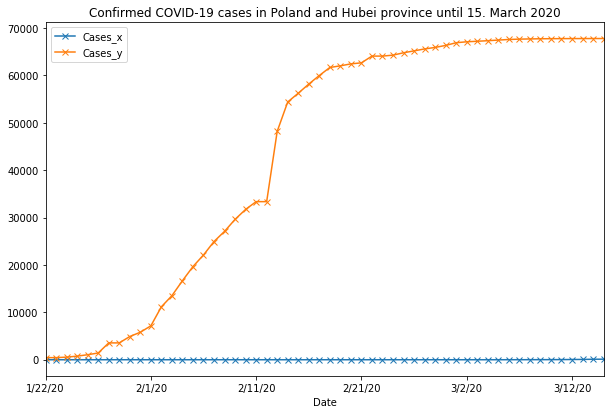

In [47]:
plot_poland_hubei = poland_hubei.plot(y=['Cases_x', 'Cases_y'], figsize=[10,6.5], marker='x', title='Confirmed COVID-19 cases in Poland and Hubei province until 15. March 2020')

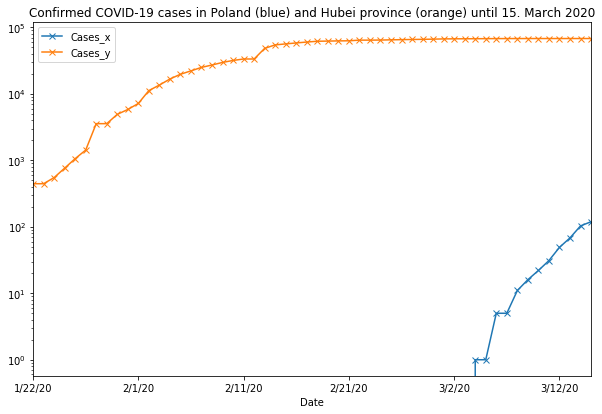

In [48]:
plot_poland_hubei = poland_hubei.plot(y=['Cases_x', 'Cases_y'], figsize=[10,6.5], marker='x', title='Confirmed COVID-19 cases in Poland (blue) and Hubei province (orange) until 15. March 2020', logy=True)